# Depression Analysis

### 1. Introduction
The primary objective of this analysis is to identify key factors contributing to depression and gain insights into the relationships between variables in the dataset. The dataset includes various features, such as demographic information, academic or work-related stressors, and lifestyle habits. These features were analyzed to uncover patterns and their potential influence on depression.

In [234]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Using consistent styles, colors, and labels.
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("paper")

# Load data
data = pd.read_csv('final_depression_dataset_1.csv')

data

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Pooja,Female,37,Ghaziabad,Working Professional,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,No,6,2,No,No
1,Reyansh,Male,60,Kalyan,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No
2,Manvi,Female,42,Bhopal,Working Professional,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No
3,Isha,Female,44,Thane,Working Professional,Teacher,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,No
4,Aarav,Male,48,Indore,Working Professional,UX/UI Designer,NaN,4.0,NaN,NaN,3.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,Raghavendra,Male,25,Bangalore,Working Professional,Consultant,NaN,1.0,NaN,NaN,5.0,5-6 hours,Healthy,BBA,Yes,12,3,Yes,No
2552,Pihu,Female,23,Pune,Working Professional,Teacher,NaN,3.0,NaN,NaN,1.0,Less than 5 hours,Moderate,MA,Yes,8,3,No,Yes
2553,Sara,Female,24,Srinagar,Working Professional,HR Manager,NaN,1.0,NaN,NaN,4.0,Less than 5 hours,Moderate,BA,Yes,4,4,No,No
2554,Eshita,Female,56,Bangalore,Working Professional,Business Analyst,NaN,2.0,NaN,NaN,3.0,7-8 hours,Healthy,BBA,No,4,5,Yes,No


### 2. Data Preperation
Handling Missing Values:
* Numerical columns were imputed using the mean, and categorical columns with missing values were replaced with either the mode or a placeholder category ("Unknown").

Feature Encoding:
* Categorical variables were encoded into numerical representations using label encoding as appropriate.
Special attention was paid to numerically categorical variables, which were treated carefully to retain their categorical meaning.

In [236]:
# Percentage of missing values in each column
missing_percentage = (data.isnull().sum() / len(data)) * 100
missing_percentage

Name                                      0.000000
Gender                                    0.000000
Age                                       0.000000
City                                      0.000000
Working Professional or Student           0.000000
Profession                               26.330203
Academic Pressure                        80.359937
Work Pressure                            19.640063
CGPA                                     80.359937
Study Satisfaction                       80.359937
Job Satisfaction                         19.640063
Sleep Duration                            0.000000
Dietary Habits                            0.000000
Degree                                    0.000000
Have you ever had suicidal thoughts ?     0.000000
Work/Study Hours                          0.000000
Financial Stress                          0.000000
Family History of Mental Illness          0.000000
Depression                                0.000000
dtype: float64

With 80% of some collumns being null we will just drop them from the data entirely. Using the 50% threshhold we will drop all data that is more than 50% null, the rest will be filled to properly analyze. 

In [238]:
# Drop columns with more than 50% null values
valid_columns = data.columns[data.isnull().sum() / len(data) < 0.5]
data = data.loc[:, valid_columns]
data

,Name,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Pooja,Female,37,Ghaziabad,Working Professional,Teacher,2.0,4.0,7-8 hours,Moderate,MA,No,6,2,No,No
1,Reyansh,Male,60,Kalyan,Working Professional,Financial Analyst,4.0,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No
2,Manvi,Female,42,Bhopal,Working Professional,Teacher,2.0,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No
3,Isha,Female,44,Thane,Working Professional,Teacher,3.0,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,No
4,Aarav,Male,48,Indore,Working Professional,UX/UI Designer,4.0,3.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,Raghavendra,Male,25,Bangalore,Working Professional,Consultant,1.0,5.0,5-6 hours,Healthy,BBA,Yes,12,3,Yes,No
2552,Pihu,Female,23,Pune,Working Professional,Teacher,3.0,1.0,Less than 5 hours,Moderate,MA,Yes,8,3,No,Yes
2553,Sara,Female,24,Srinagar,Working Professional,HR Manager,1.0,4.0,Less than 5 hours,Moderate,BA,Yes,4,4,No,No
2554,Eshita,Female,56,Bangalore,Working Professional,Business Analyst,2.0,3.0,7-8 hours,Healthy,BBA,No,4,5,Yes,No


In [239]:
# Dropping Name from analysis because it has no analytical significance
data.drop('Name', axis=1, inplace=True)

# Replacing numeric categorical data to categorical
data['Work Pressure'] = data['Work Pressure'].map({1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'})
data['Job Satisfaction'] = data['Job Satisfaction'].map({1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'})

# Replacing categorical null values with a 'Unknown" category
data['Profession'] = data['Profession'].fillna('Unknown')
data['Work Pressure'] = data['Work Pressure'].fillna('Unknown')
data['Job Satisfaction'] = data['Job Satisfaction'].fillna('Unknown')

# Converting categorical columns to numerical values
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data['Working Professional or Student'] = data['Working Professional or Student'].map({ 'Student': 1, 'Working Professional': 0})  
data['Depression'] = data['Depression'].map({'Yes': 1, 'No': 0})
data['Family History of Mental Illness'] = data['Family History of Mental Illness'].map({'Yes': 1, 'No': 0})
data['Suicidal Thoughts'] = data['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0})
data.drop('Have you ever had suicidal thoughts ?', axis=1, inplace=True)

# Cleaning sleep_duration by averaging the values
sleep_duration_mapping = {
    "7-8 hours": 7.5,
    "5-6 hours": 5.5,
    "Less than 5 hours": 4.5,
    "More than 8 hours": 8.5
}

# Map text values to numerical values
data['Sleep Duration'] = data['Sleep Duration'].map(sleep_duration_mapping)

data

,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Suicidal Thoughts
0,0,37,Ghaziabad,0,Teacher,Disagree,Agree,7.5,Moderate,MA,6,2,0,0,0
1,1,60,Kalyan,0,Financial Analyst,Agree,Neutral,5.5,Unhealthy,B.Com,0,4,1,0,1
2,0,42,Bhopal,0,Teacher,Disagree,Neutral,5.5,Moderate,M.Com,0,2,0,0,0
3,0,44,Thane,0,Teacher,Neutral,Strongly Agree,7.5,Healthy,MD,1,2,1,0,1
4,1,48,Indore,0,UX/UI Designer,Agree,Neutral,7.5,Moderate,BE,6,5,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,1,25,Bangalore,0,Consultant,Strongly Disagree,Strongly Agree,5.5,Healthy,BBA,12,3,1,0,1
2552,0,23,Pune,0,Teacher,Neutral,Strongly Disagree,4.5,Moderate,MA,8,3,0,1,1
2553,0,24,Srinagar,0,HR Manager,Strongly Disagree,Agree,4.5,Moderate,BA,4,4,0,0,1
2554,0,56,Bangalore,0,Business Analyst,Disagree,Neutral,7.5,Healthy,BBA,4,5,1,0,0


In [240]:
# Check for missing values
null_data_count = data.isnull().sum()
null_data_count

Gender                              0
Age                                 0
City                                0
Working Professional or Student     0
Profession                          0
Work Pressure                       0
Job Satisfaction                    0
Sleep Duration                      0
Dietary Habits                      0
Degree                              0
Work/Study Hours                    0
Financial Stress                    0
Family History of Mental Illness    0
Depression                          0
Suicidal Thoughts                   0
dtype: int64

with the data now clean we are ready to explore the data for analysis

In [242]:
# Selecting numeric columns
numeric_data = data.select_dtypes(include=[np.number])
# Select all categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

### 3. Exploratory Data Analysis (EDA)
Univariate Analysis:
* Histograms and boxplots were used to understand the distribution of numerical variables.
* Categorical variables were visualized using bar plots, highlighting the frequency distribution of categories.

Bivariate Analysis:
* Correlations between numerical features and the target variable (Depression) were calculated and visualized using a heatmap and bar charts.
* Scatterplots and pairplots were used to identify relationships between numerical features.

Key Findings:
* Features such as Work Pressure, Financial Stress, and Sleep Duration showed notable relationships with depression.
* Categorical features like Profession and Degree highlighted disparities in depression rates across groups.

In [244]:
# Create a summary DataFrame
summary = pd.DataFrame({
    "Non-Null Count": data.notnull().sum(),
    "Data Type": data.dtypes,
    "Unique Values": data.nunique()
})

summary

,Non-Null Count,Data Type,Unique Values
Gender,2556,int64,2
Age,2556,int64,43
City,2556,object,30
Working Professional or Student,2556,int64,2
Profession,2556,object,36
Work Pressure,2556,object,6
Job Satisfaction,2556,object,6
Sleep Duration,2556,float64,4
Dietary Habits,2556,object,3
Degree,2556,object,27


In [245]:
describe_data = data.describe().T
describe_data

,count,mean,std,min,25%,50%,75%,max
Gender,2556.0,0.521518,0.499635,0.0,0.0,1.0,1.0,1.0
Age,2556.0,39.043036,12.260596,18.0,28.0,39.0,50.0,60.0
Working Professional or Student,2556.0,0.196401,0.397353,0.0,0.0,0.0,0.0,1.0
Sleep Duration,2556.0,6.491393,1.578452,4.5,4.5,7.5,7.5,8.5
Work/Study Hours,2556.0,6.023865,3.771743,0.0,3.0,6.0,9.0,12.0
Financial Stress,2556.0,2.968701,1.415527,1.0,2.0,3.0,4.0,5.0
Family History of Mental Illness,2556.0,0.487089,0.499931,0.0,0.0,0.0,1.0,1.0
Depression,2556.0,0.178013,0.382598,0.0,0.0,0.0,0.0,1.0
Suicidal Thoughts,2556.0,0.488654,0.499969,0.0,0.0,0.0,1.0,1.0


In [246]:
# Range (max - min)
data_range = data.max(numeric_only=True) - data.min(numeric_only=True)
print("Range:\n", data_range)

# Variance
data_variance = data.var(numeric_only=True)
print("Variance:\n", data_variance)

# Skewness (asymmetry of data distribution)
data_skewness = data.skew(numeric_only=True)
print("Skewness:\n", data_skewness)

# Kurtosis (tail heaviness)
data_kurtosis = data.kurt(numeric_only=True)
print("Kurtosis:\n", data_kurtosis)

Range:
 Gender                               1.0
Age                                 42.0
Working Professional or Student      1.0
Sleep Duration                       4.0
Work/Study Hours                    12.0
Financial Stress                     4.0
Family History of Mental Illness     1.0
Depression                           1.0
Suicidal Thoughts                    1.0
dtype: float64
Variance:
 Gender                                0.249635
Age                                 150.322218
Working Professional or Student       0.157889
Sleep Duration                        2.491511
Work/Study Hours                     14.226045
Financial Stress                      2.003717
Family History of Mental Illness      0.249931
Depression                            0.146381
Suicidal Thoughts                     0.249969
dtype: float64
Skewness:
 Gender                             -0.086202
Age                                -0.005077
Working Professional or Student     1.529307
Sleep Duratio

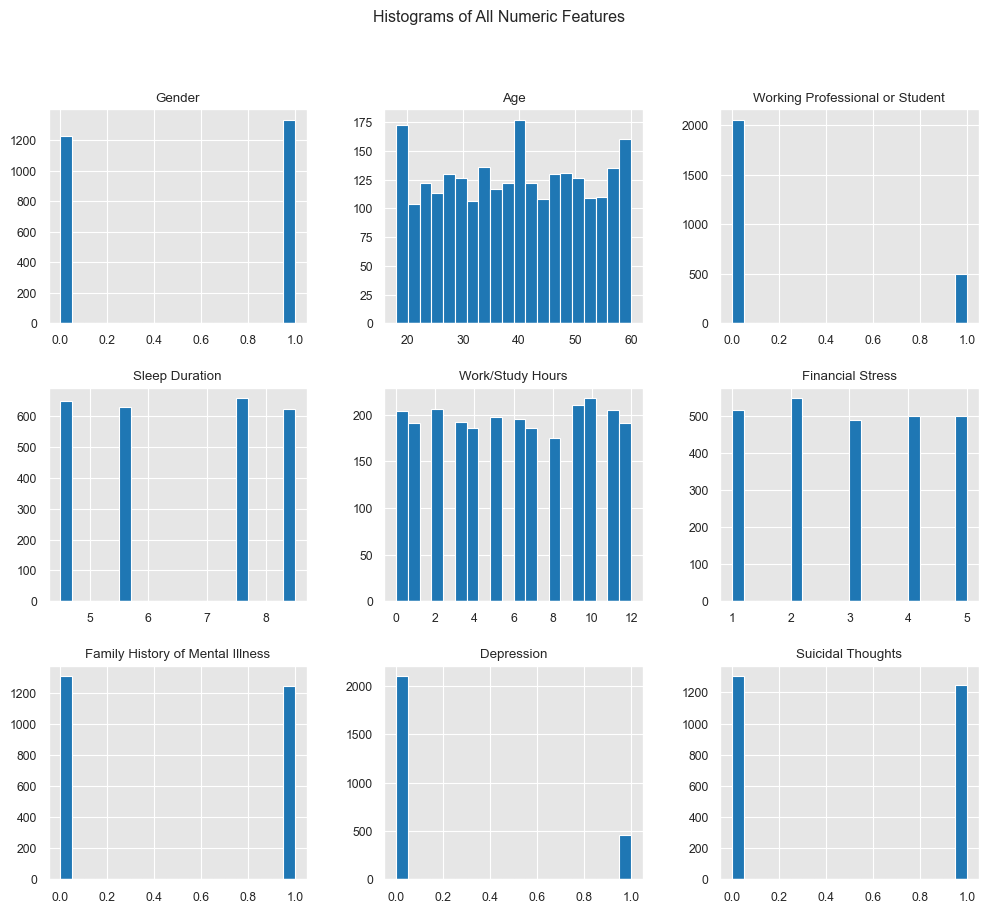

In [247]:
# Visual representation shows skew in both student and depression.
# Plot histograms for numeric columns
data.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms of All Numeric Features")
plt.show()

#### Key Takeaways
* `Gender` at 52% giving us a balanced dataset.
* `Age` range from 18- 60 also giving us a blanced dataset of just adults. Though skewed slightly to older individuals.
* `Working Professional/Student` skewed 80% towards Working Professionals. Students will be slightly underrepresented in this dataset.
* `Depression` 17.8% of the population has been marked as having depression. The low percenate may require techniques like oversampling, undersampling, or class-weight adjustments if building predictive models.
* `Suicidal Thoughts` Around 48.9% of the participants have had suicidal thoughts, significantly higher than the prevalence of depression. This suggests a potential overlap but not a direct 1:1 relationship between suicidal thoughts and depression.
* `Family History of Mental Illness` Around 48.7% of participants reported a family history of mental illness, which could be a key risk factor in analysis.
* `Work Pressure` Feature with high variablility.
* `Sleep Duration` with the mean being 6.49 hours, indicating that the average participant sleeps less than the recommended 7–8 hours. A potential factor for poor mental health.
* `Work/Study Hours` Wide range of values with a mean of 6.02 hours per day. Would need further analysis.
* `Financial Stress` with a mean of 2.97 on a 5-point scale, indicating moderate financial stress on average.

Categorical features Profession, Dietary Habits and Degree will be analyzed later in the notebook. Next we will explore the numerical variables to see if there are any stand out using a heatmap

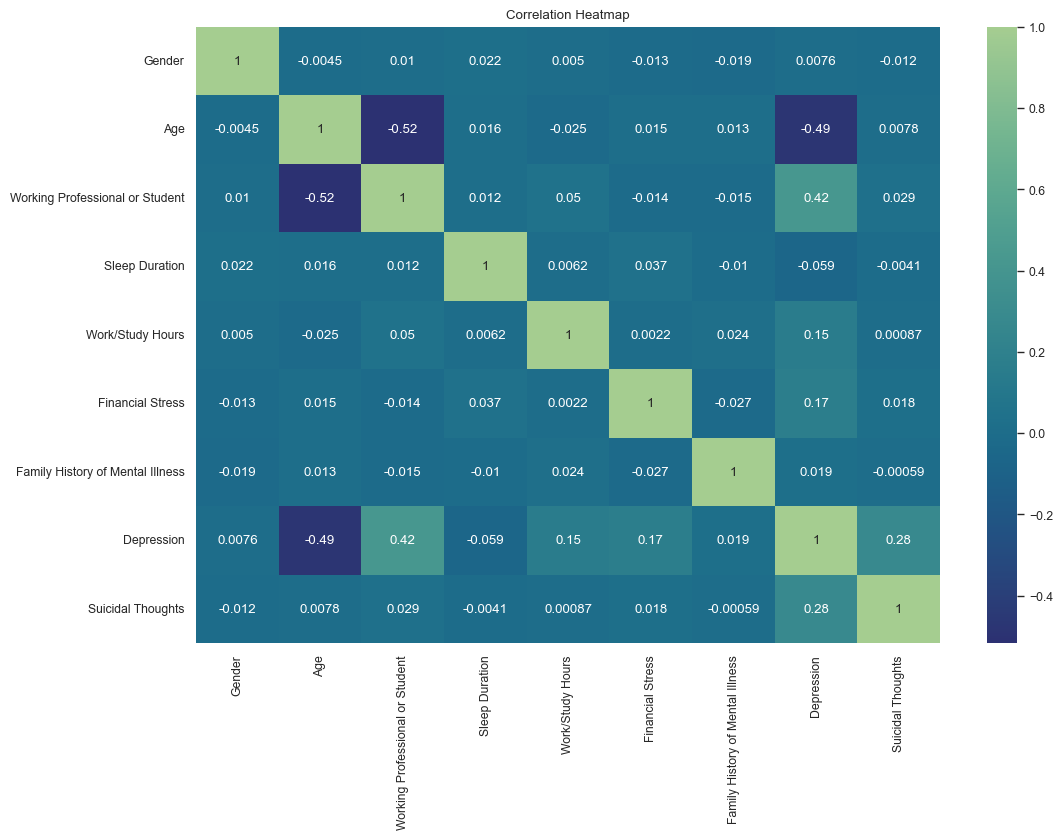

In [249]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='crest_r')
plt.title('Correlation Heatmap')
plt.show()

Looking at the heatmap it is clear that Depression has

* a small positive correlation to `Suicidal Thoughts`
* a medium negative correlation to `Age`, and `Working Professional` 

#### Age Exploration

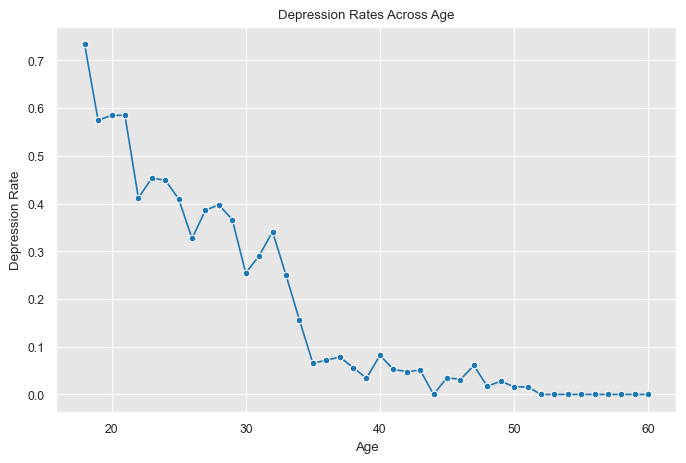

In [252]:
# Calculate depression rates for each age
age_depression_rates = data.groupby('Age')['Depression'].mean()

# Plot depression rates over age
plt.figure(figsize=(8, 5))
sns.lineplot(x=age_depression_rates.index, y=age_depression_rates.values, marker='o')
plt.title('Depression Rates Across Age')
plt.xlabel('Age')
plt.ylabel('Depression Rate')
plt.show()

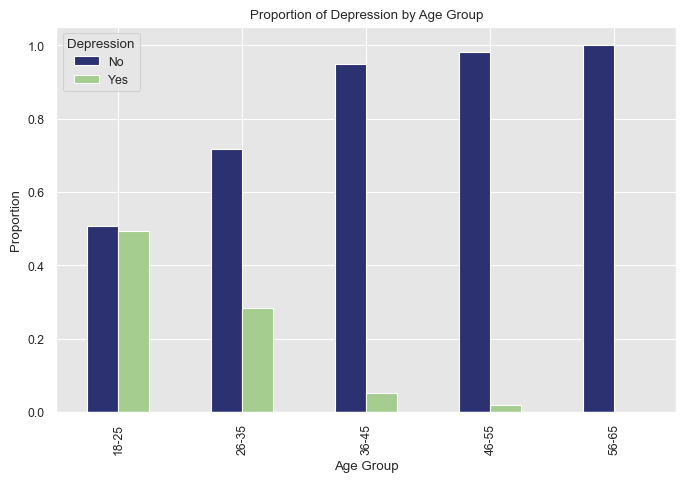

In [253]:
# Create Age Groups for better visualization
data['Age Group'] = pd.cut(data['Age'], bins=[18, 25, 35, 45, 55, 65], labels=['18-25', '26-35', '36-45', '46-55', '56-65'])

# Create a count table for Age Group and Depression
age_depression_counts = pd.crosstab(data['Age Group'], data['Depression'], normalize='index')

# Plot stacked bar chart
age_depression_counts.plot(kind='bar', figsize=(8, 5), colormap='crest_r')
plt.title('Proportion of Depression by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.legend(title='Depression', labels=['No', 'Yes'])
plt.show()


Age and Depression:
Depression rates are highest among individuals aged 18-25. The relationship between age and depression observed in this dataset aligns with well-established patterns in mental health research. Younger age groups, particularly those aged 18–25, often experience higher rates of depression due to factors such as transitional life stages, academic and career pressures, and social challenges. Conversely, older age groups tend to report lower rates of depression, potentially due to increased emotional stability, coping mechanisms developed over time, and more stable life circumstances. These findings are consistent with commonly recognized trends in the field of mental health.

#### Exploration of Binary variables that were significant in correlation heatmap

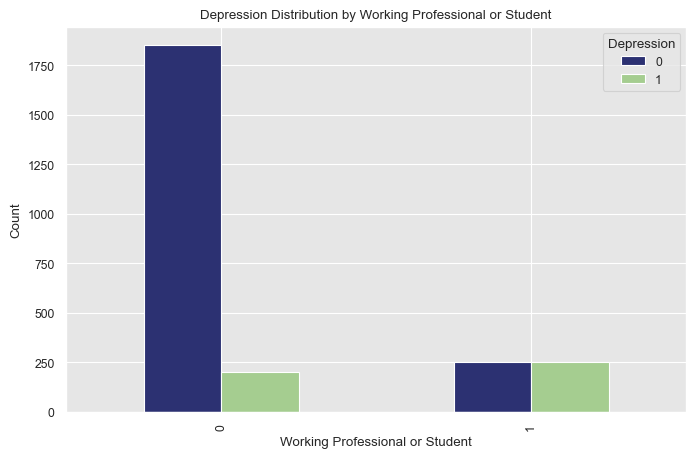

In [256]:
# Plot depression rates for each binary variable

pd.crosstab(data['Working Professional or Student'], data['Depression']).plot(
        kind='bar', figsize=(8, 5), colormap='crest_r')
plt.title(f'Depression Distribution by Working Professional or Student')
plt.ylabel('Count')
plt.xlabel('Working Professional or Student')
plt.show()

This dataset shows that all students reported experiencing depression. While this could indicate severe stressors associated with academic life, such as workload, performance pressure, and uncertainty about the future, it is also possible that the dataset may not include non-depressed students, leading to an overrepresentation of depression in this group.

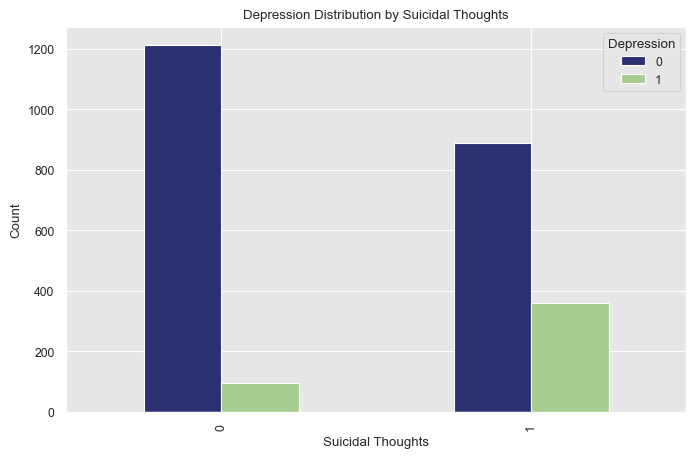

In [258]:
pd.crosstab(data['Suicidal Thoughts'], data['Depression']).plot(
        kind='bar', figsize=(8, 5), colormap='crest_r')
plt.title(f'Depression Distribution by Suicidal Thoughts')
plt.ylabel('Count')
plt.xlabel('Suicidal Thoughts')
plt.show()

Although individuals reporting suicidal thoughts show a higher likelihood of depression compared to those without such thoughts, the difference is less pronounced than one might intuitively expect. This suggests that while suicidal thoughts are a significant indicator of mental health struggles, depression is influenced by a combination of factors, and not all individuals with suicidal thoughts meet the clinical threshold for depression.

Lets explore more categorical data to find some possible correlations

In [260]:
def plot_depression_by_category(data, category_column, palette="viridis"):
    # Calculate depression percentage for each category in the specified column
    depression_percentage = data.groupby(category_column)['Depression'].mean().sort_values(ascending=False)
    
    # Get the ordered categories
    category_order = depression_percentage.index
    
    # Create the plot with the specified palette
    plt.figure(figsize=(12, 8))
    sns.countplot(y=category_column, hue='Depression', data=data, palette=palette, order=category_order)
    plt.legend(title="Depression", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(f'Depression by {category_column} (Ordered by Depression Percentage)')
    plt.show()

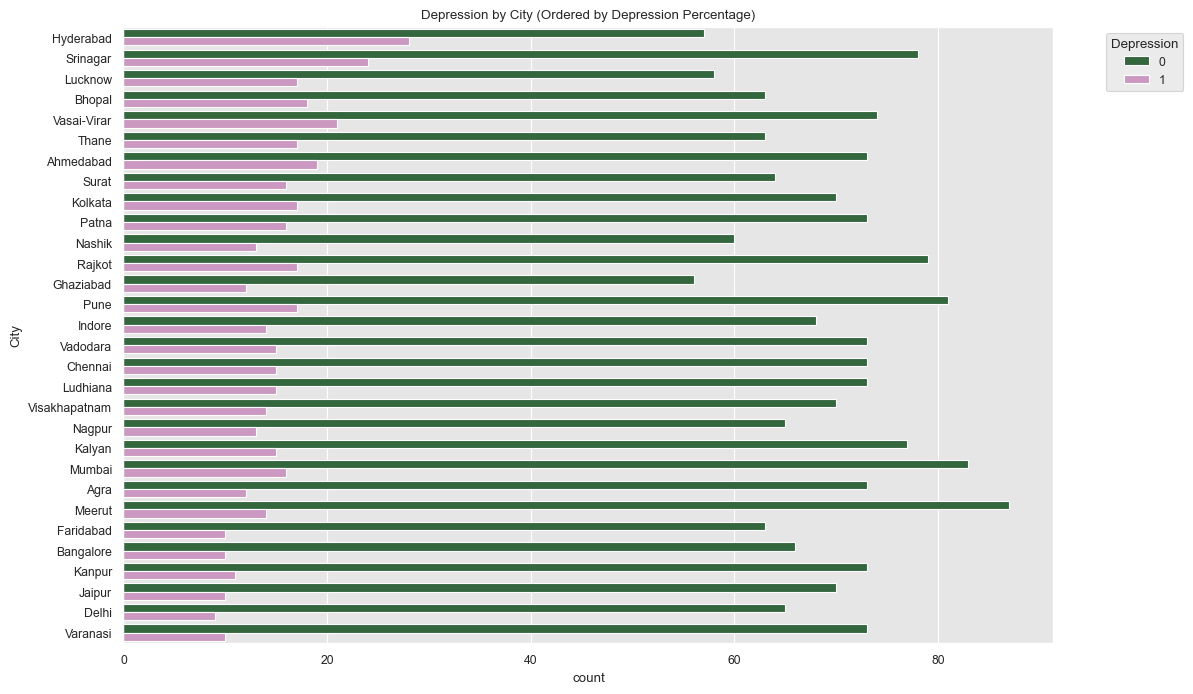

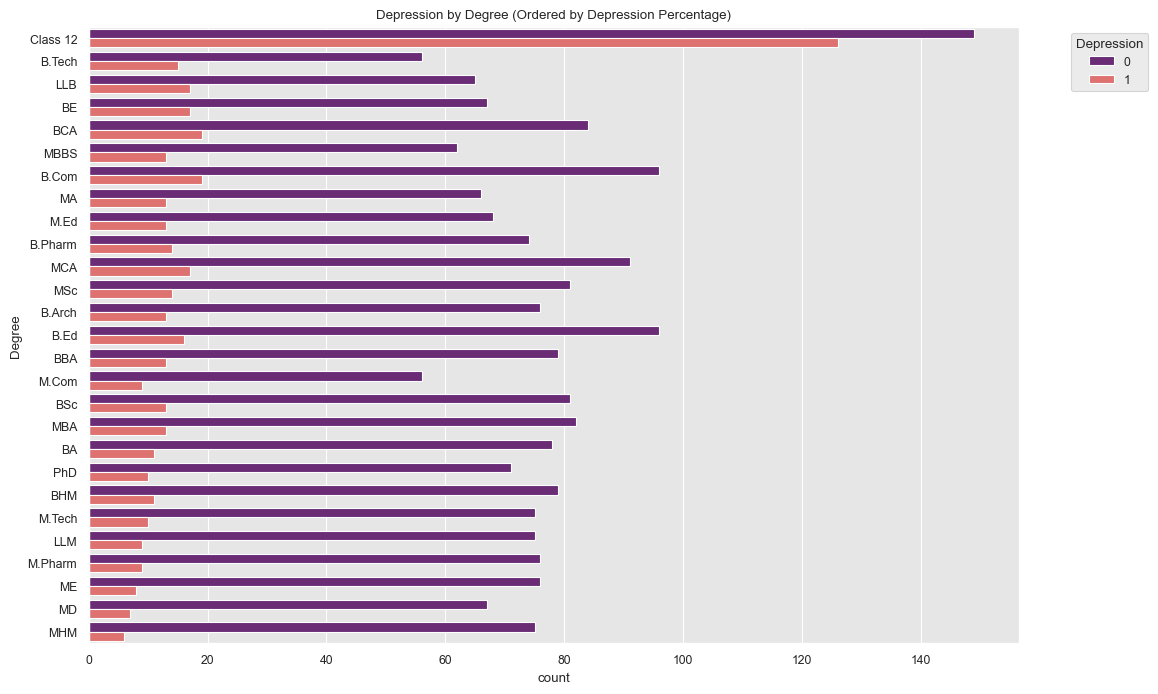

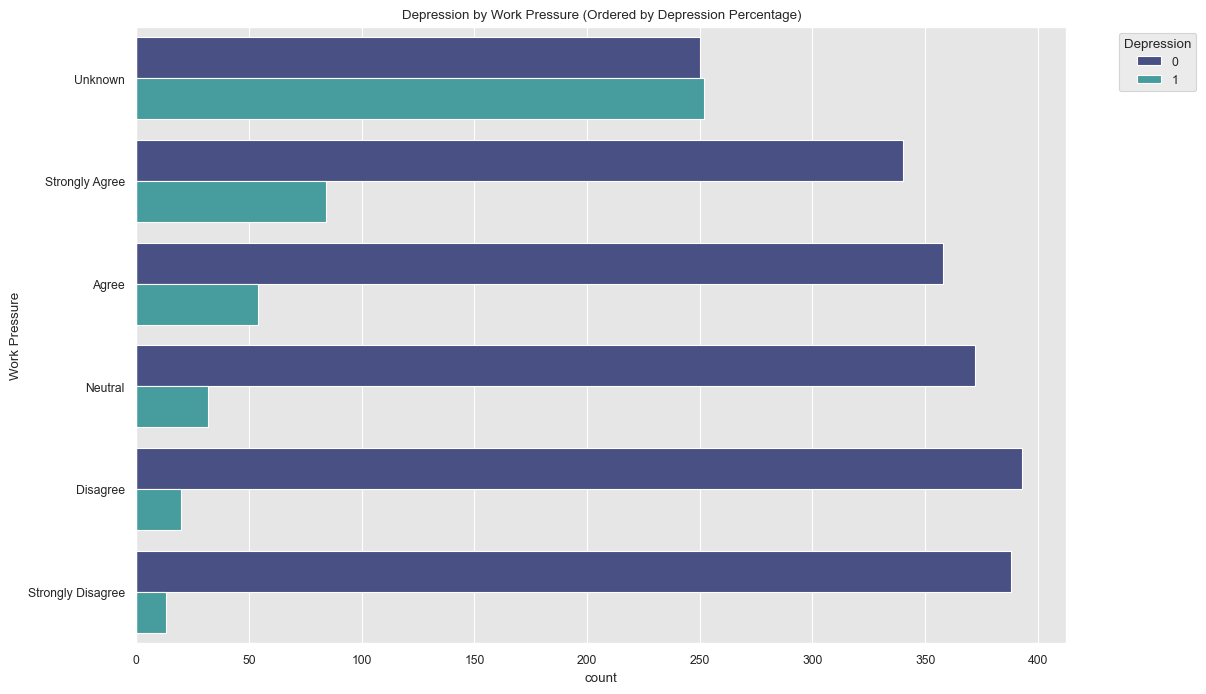

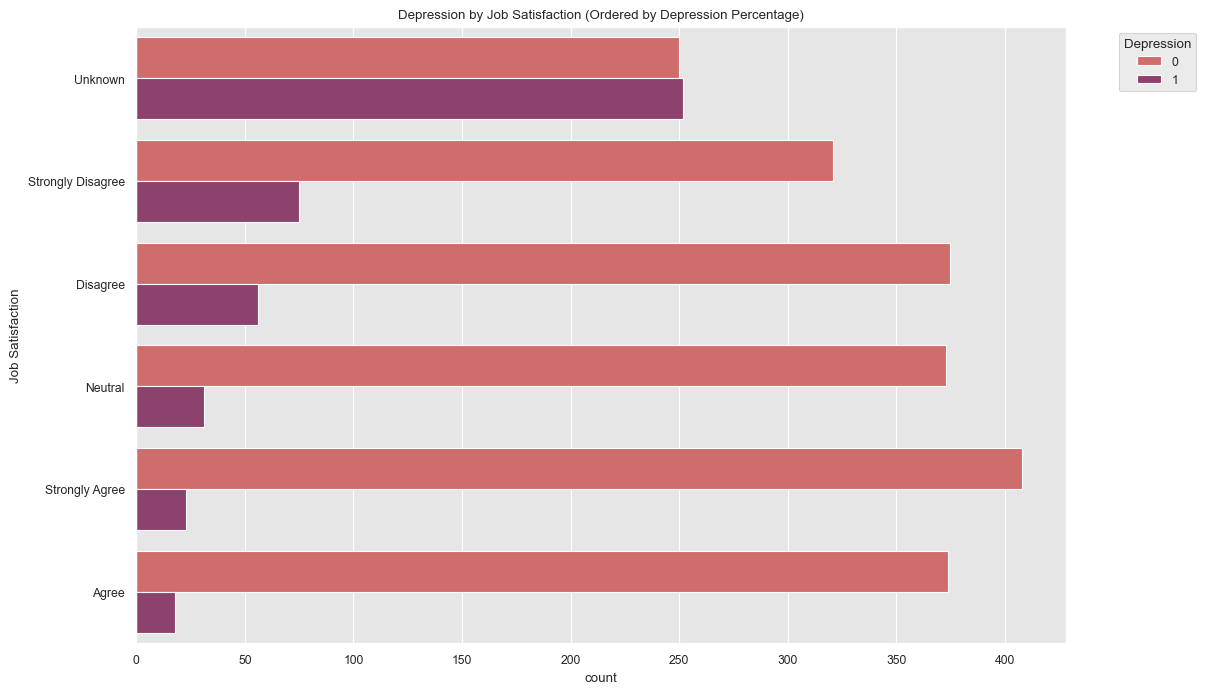

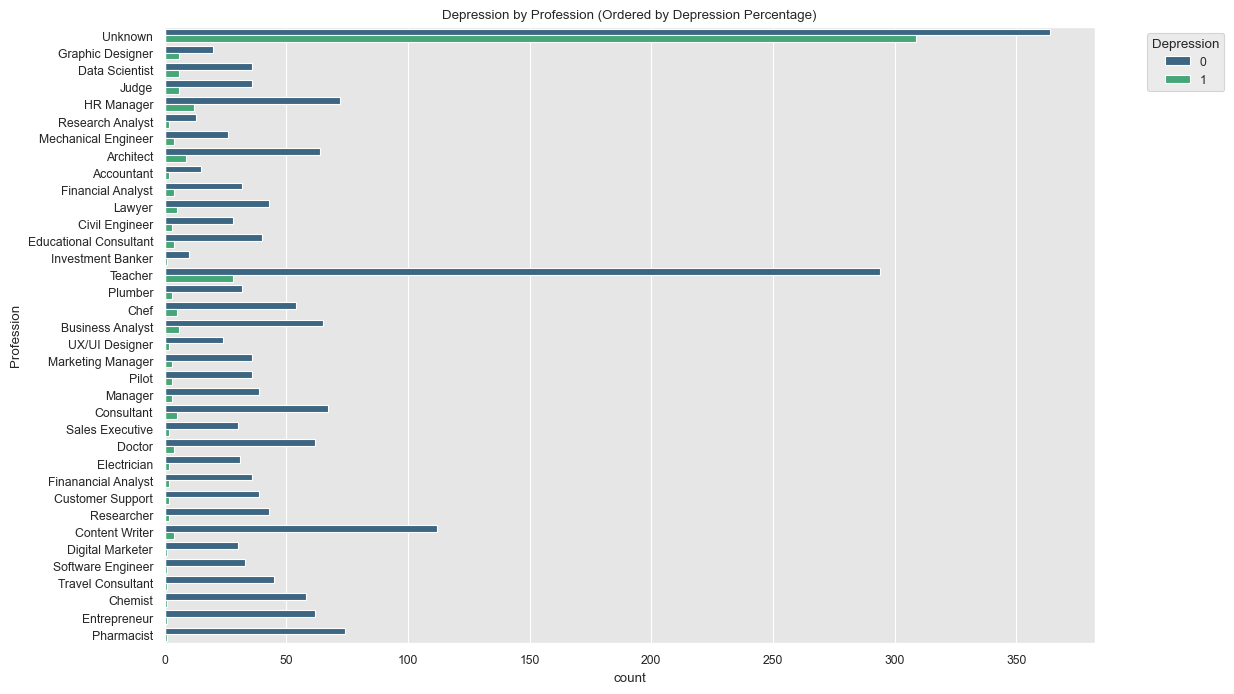

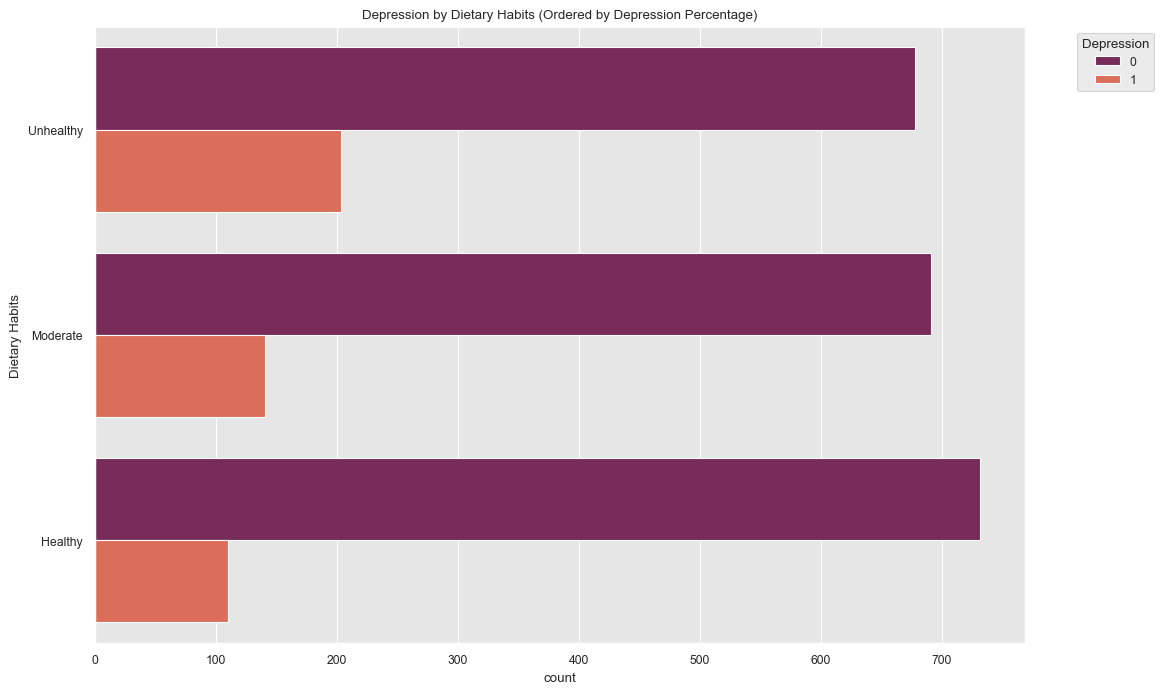

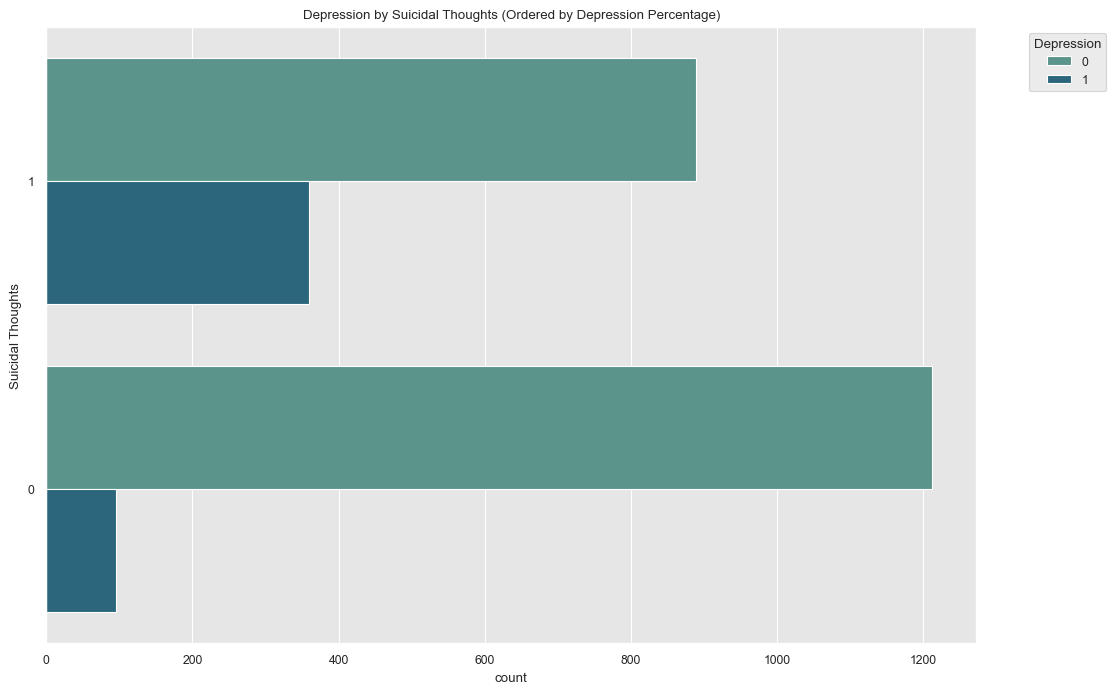

In [261]:
# List of categorical columns you want to analyze
categorical_columns = ['City','Degree', 'Work Pressure', 'Job Satisfaction', 'Profession','Dietary Habits','Suicidal Thoughts', 'Sleep Duration'] 

# Access the categorical data
categorical_data = data[categorical_columns]

# Color palettes for each plot
palettes = ["cubehelix", "magma", "mako", "flare", "viridis", "rocket", "crest"]

# Loop through each categorical column and generate the plot
for column, palette in zip(categorical_columns, palettes):
    plot_depression_by_category(data, column, palette=palette)


##### Key Takeaways from categorical exploration
* Some stand out categorical features highlighted Hyderbad as the `City` with the highest percentage of depression.
* Class 12 or being in your final year of highscool was almost 1:1 in depression and a stand out in the Depression by `Degree` category.
* There was a strong percentage of depression by both `Work Pressure and Job Satisfaction` in people who did not have values 'Unknown', and people who answered a 5 on a 1-5 scale.
* Depression by `Profession` showed 'Unknown' again as an almost 1:1 for depression, this could be interpreted as people who are unemployed or were not willing to answer this question. The second most depression by Profession was Graphic Designer but this data sample would be much to small to assume anything about the overall group.
* Depression by `Dietary Habits` had Unhealthy leading in depression percentage, but not by a significant amount.
* `Suicidal Thoughts` suprised me by the No's still having some depression and the Yes only having half depression. Which makes sense, as suicidal thoughts are a direct indicator or correlate to mental health issues like depression.

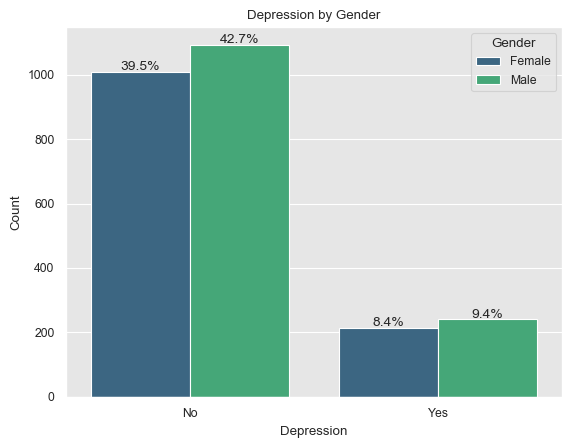

In [263]:
# 0=Female 1=Male
data['Gender'] = data['Gender'].replace({0: 'Female', 1: 'Male'})
data['Depression'] = data['Depression'].replace({0: 'No', 1: 'Yes'})
# Add percentage annotations
ax = sns.countplot(x='Depression', hue='Gender', palette='viridis', data=data)
plt.title('Depression by Gender')
plt.xlabel('Depression')
plt.ylabel('Count')
plt.legend(title='Gender')

# Calculate percentages
total = len(data)
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 5,
                f'{(height / total * 100):.1f}%', ha='center', fontsize=10)
plt.show()

 `Gender` I wanted to isolate this for analysis because of common knowledge of higher rates in suicide by men over women. While there was a difference it was very small, while analizing the age groups it became more clear that age was much more of a significant factor for depression.
Key Insights:

Depression seems to affect both genders significantly, but Males are slightly more prone to depression.
This can suggest potential gender-specific factors contributing to mental health challenges (e.g., societal, biological, or psychological influences).

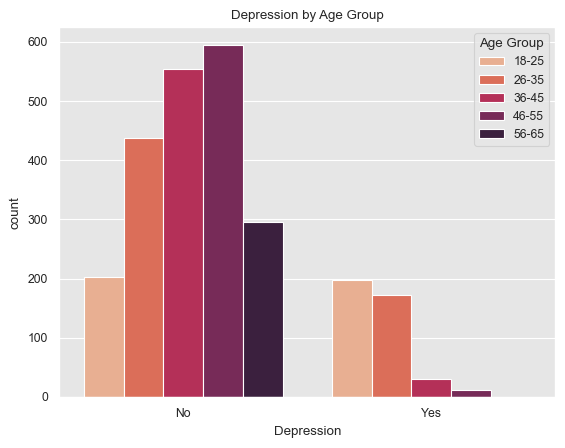

In [265]:
# Distribution of depression by age groups
data_age = data
data_age['Age Group'] = pd.cut(data['Age'], bins=[18, 25, 35, 45, 55, 65], 
                           labels=['18-25', '26-35', '36-45', '46-55', '56-65'])
sns.countplot(x='Depression', hue='Age Group', palette='rocket_r', data=data)
plt.title('Depression by Age Group')
plt.show()


Observation:

Individuals aged 18-25 and 26-35 (younger groups) have higher counts of depression (Depression=1) compared to older groups.
The older age groups (e.g., 46-55 and 56-65) show significantly fewer individuals with depression.
Across all age groups, the number of non-depressed individuals (Depression=0) is consistently higher than those with depression.
Key Insights:

Younger age groups, particularly 18-25 and 26-35, seem to have a higher proportion of depressed individuals. This could be due to factors like academic pressure, career instability, or lack of social support.
Depression prevalence decreases with age, suggesting that older age groups might have better coping mechanisms, more stable lifestyles, or less exposure to certain stressors.

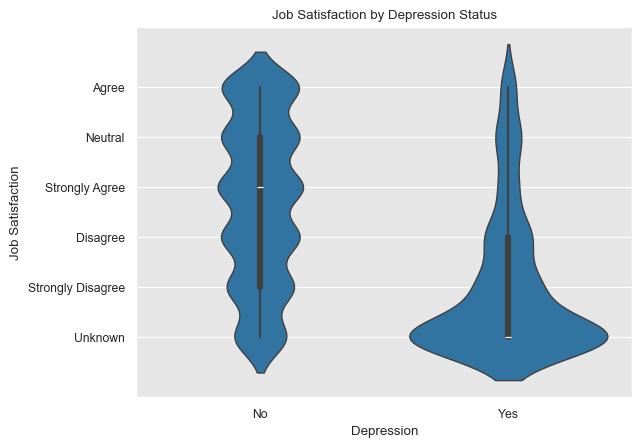

In [267]:
sns.violinplot(x='Depression', y='Job Satisfaction', data=data)
plt.title('Job Satisfaction by Depression Status')
plt.show()

Insights of `Job Satisfaction`:

* `Job Satisfaction` is a significant factor in depression, with dissatisfaction being more prevalent in the depressed group.
* Promoting workplace well-being and improving job satisfaction may help reduce depression rates.
* The broader spread in the non-depressed group suggests that job satisfaction is not the sole determinant of mental health but an important contributing factor.

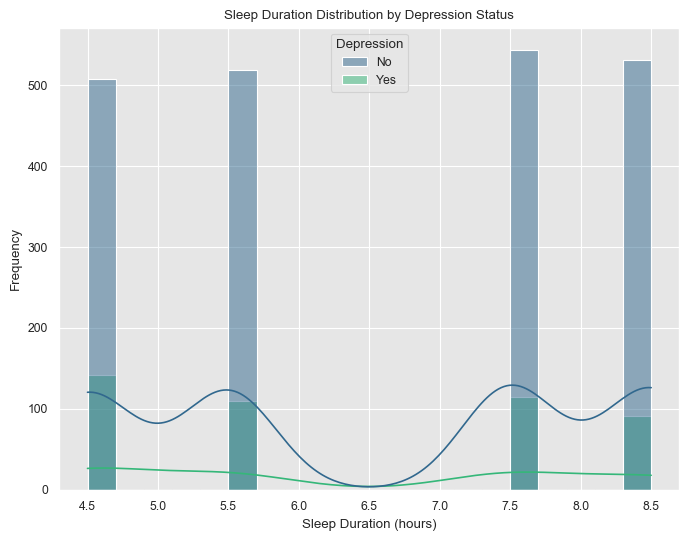

In [269]:
# Histogram for Sleep Duration by Depression
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Sleep Duration', hue='Depression', kde=True, palette='viridis', bins=20)
plt.title('Sleep Duration Distribution by Depression Status')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

Although the heatmap did not reveal a significant correlation, I wanted to explore the relationship between sleep duration and depression further, based on the common assumption that shorter sleep durations are associated with higher depression rates. Below is an analysis of the data:

1. Shorter Sleep Durations Show Higher Depression Rates:

    Individuals with shorter sleep durations (e.g., 4.5 to 5.5 hours) exhibit a noticeable presence of depression (Yes) compared to those with longer sleep durations.
    This aligns with research suggesting that inadequate sleep is a significant risk factor for depression.

2. Peak Sleep Durations Without Depression:

    There are clear peaks in the "No Depression" group at 5.5, 7.5, and 8.5 hours, indicating that these sleep durations are most common among individuals not experiencing depression.
    These peaks suggest that optimal or longer sleep durations are protective against depression.

3. Balance Between Duration and Mental Health:
    Individuals with 7.5 to 8.5 hours of sleep appear to have the lowest depression rates, potentially indicating an optimal sleep range for mental well-being.

4. Outlier Behavior:
    The smaller depression counts at 8.5 hours indicate that very long sleep durations may also reduce depression risk but occur less frequently in the dataset.

### 4. Statistical Analysis
Chi-Square Test:
* The chi-square test was applied to categorical features to evaluate their association with `Depression`.

Mutual Information:
* Mutual information scores were computed for categorical features, revealing their dependency on the target variable.

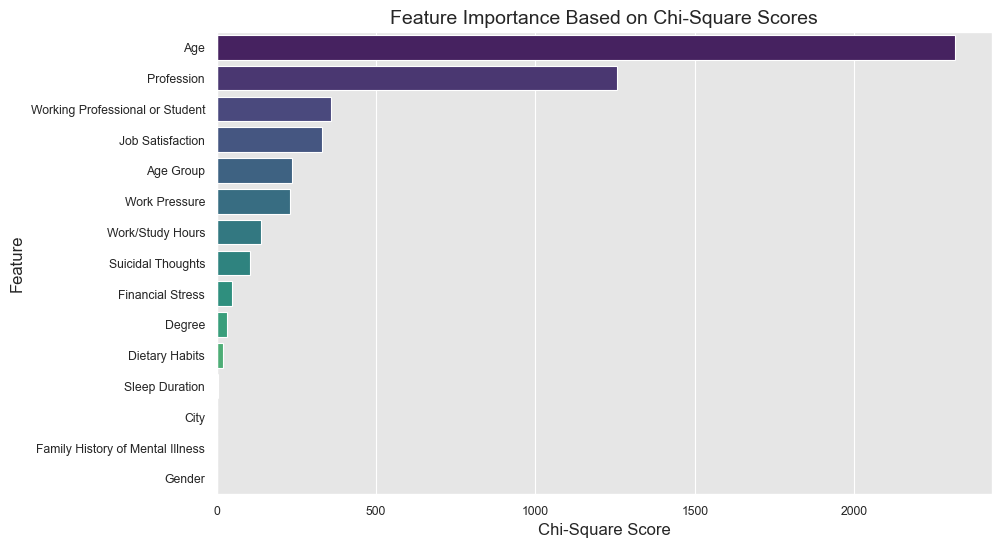

In [272]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables as integers
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
encoded_data = data.copy()
encoder = LabelEncoder()
for col in categorical_columns:
    encoded_data[col] = encoder.fit_transform(encoded_data[col].astype(str))

# SelectKBest with Chi-Square
X = encoded_data.drop(columns=['Depression'])
y = encoded_data['Depression']
chi2_selector = SelectKBest(chi2, k='all').fit(X, y)
chi2_scores = pd.DataFrame({
    'Feature': X.columns,
    'Chi-Square Score': chi2_selector.scores_
}).sort_values(by='Chi-Square Score', ascending=False)

# Plot the Chi-Square Scores as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Chi-Square Score', y='Feature', hue='Feature', data=chi2_scores, palette='viridis')
plt.title('Feature Importance Based on Chi-Square Scores', fontsize=14)
plt.xlabel('Chi-Square Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

#### Key Takeaways from Chi-Square Scores

##### 1. Highly Associated Features
- `Age` and `Profession` have the strongest association with depression, indicating that certain age groups (e.g., younger individuals) and job types significantly influence depression risk.
- `Working Professional or Student`, `Job Satisfaction`, and `Work Pressure` highlight the impact of academic or workplace stress on mental health.
- `Suicidal Thoughts` strongly predict depression, aligning with clinical evidence that suicidal ideation is a critical indicator of mental health issues.

##### 2. Moderately Associated Features
- `Work or Study Hours` and `Financial Stress` are moderately associated with depression, emphasizing the importance of balancing workload and addressing financial insecurity.
- `Degree` and `Dietary Habits` show smaller but notable relationships, potentially reflecting the stress tied to education or lifestyle choices.

##### 3. Weakly Associated Features
- `Sleep duration` and Family History of mental illness have weak associations, suggesting that in this dataset, these factors are less predictive of depression compared to stressors like work, finances, or job satisfaction.
- `Gender` shows no significant association with depression, indicating similar depression rates across genders.

These results emphasize the importance of focusing on age, profession, work-life balance, and financial stress in addressing depression, while features like gender and family history appear to play a lesser role in this dataset.

In [274]:
# Correlation of features with Depression
target_corr = encoded_data.corr()['Depression'].sort_values(ascending=False)
print("Correlation with Depression:\n", target_corr)

Correlation with Depression:
 Depression                          1.000000
Working Professional or Student     0.418708
Job Satisfaction                    0.335822
Suicidal Thoughts                   0.281669
Work Pressure                       0.277475
Profession                          0.274916
Financial Stress                    0.165669
Work/Study Hours                    0.152465
Dietary Habits                      0.108215
Family History of Mental Illness    0.019182
City                                0.010467
Gender                              0.007595
Degree                             -0.051918
Sleep Duration                     -0.059030
Age Group                          -0.321141
Age                                -0.485147
Name: Depression, dtype: float64


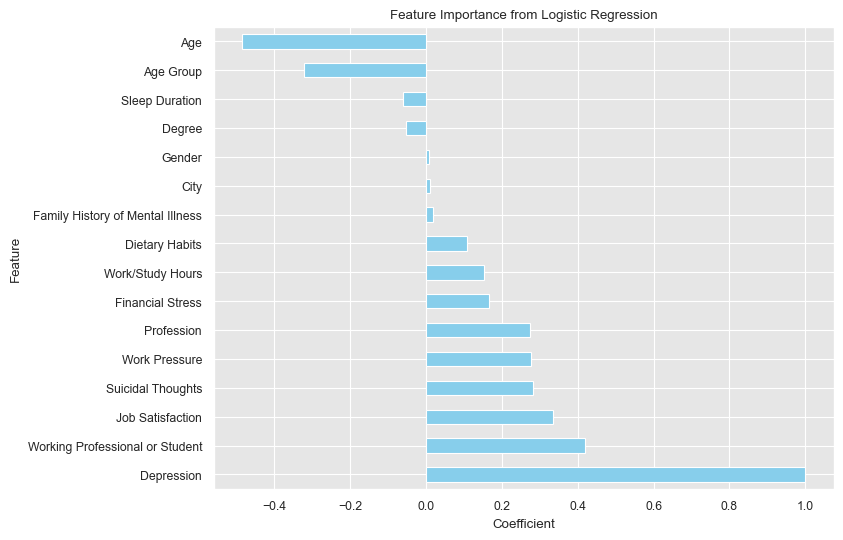

In [275]:
# Plot feature importance
target_corr.plot(kind='barh', x='Feature', y='Coefficient', figsize=(8, 6), color='skyblue')
plt.title('Feature Importance from Logistic Regression')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

Correlation shows a slightly different picture here: 
#### Key Takeaways from Correlations with Depression

##### 1. Strongest Positive Correlations
- `Working Professional or Student` (0.42) and `Job Satisfaction` (0.34) show the highest positive correlations, indicating that professional or student status and job satisfaction are key contributors to depression.
- `Suicidal Thoughts` (0.28) and `Work Pressure` (0.28) are also strongly associated with depression, highlighting mental and workplace stress as significant factors.

##### 2. Moderate Positive Correlations
- `Financial Stress` (0.17) and `Work/Study Hours` (0.15) have moderate correlations with depression, emphasizing the impact of financial and workload pressures on mental health.

##### 3. Weak or Negligible Correlations
- Factors like `Dietary Habits` (0.11), `Family History of Mental Illness` (0.02), and `Gender` (0.01) have weak or negligible correlations, suggesting limited direct influence in this dataset.

##### 4. Negative Correlations
- `Age` (-0.49) and `Age Group` (-0.32) show strong negative correlations, indicating that younger individuals are at a higher risk of depression compared to older age groups.
- `Sleep Duration` (-0.06) has a small almost neglegable negative correlation, aligning with the understanding that adequate sleep is protective against depression.

##### Summary
These results suggest that younger individuals, professionals/students, and those facing work or financial stress are most at risk of depression, while protective factors include older age and potentially longer sleep duration.


Most significant Correlated Data compared to each other to find possible correlation between the variables

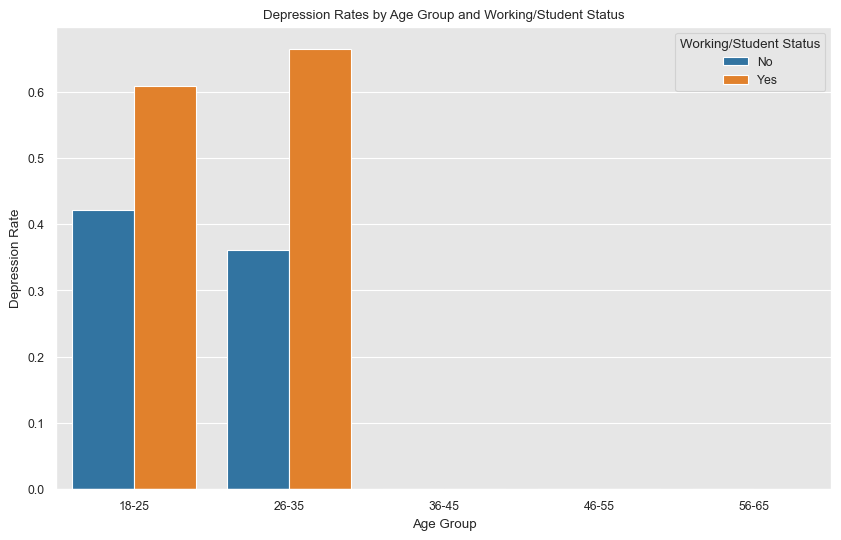

In [278]:
# Comparing highest ranked
# Bin Age into groups
data['Age Group'] = pd.cut(data['Age'], bins=[18, 25, 35, 45, 55, 65], 
                           labels=['18-25', '26-35', '36-45', '46-55', '56-65'])
# Grouped bar plot, Depression rates by Age Group and Working/student
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Working Professional or Student', hue='Depression', data=data, errorbar=None)
plt.title('Depression Rates by Age Group and Working/Student Status')
plt.ylabel('Depression Rate')
plt.xlabel('Age Group')
plt.legend(title='Working/Student Status')
plt.show()

Higher Depression Rates Among Students/Working Individuals:

* Across both the 18–25 and 26–35 age groups, individuals with a Working/Student Status = Yes exhibit significantly higher depression rates compared to those with a Working/Student Status = No.
* This indicates that being a student or part of the workforce is associated with elevated depression rates, likely due to academic, career, or financial pressures.

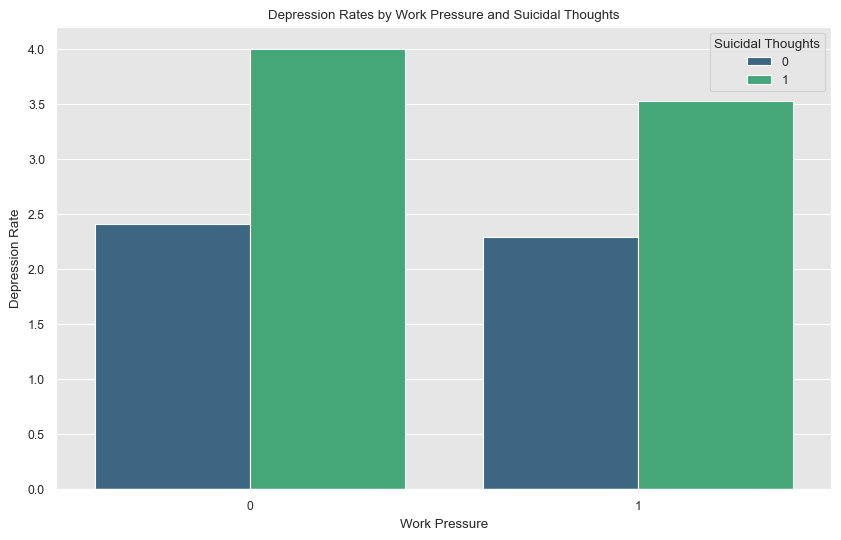

In [280]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Suicidal Thoughts', hue='Depression', y='Work Pressure', data=encoded_data, palette='viridis', errorbar=None)
plt.title('Depression Rates by Work Pressure and Suicidal Thoughts')
plt.xlabel('Work Pressure')
plt.ylabel('Depression Rate')
plt.legend(title='Suicidal Thoughts')
plt.show()

Potential Stress Impact:

The stark contrast in depression rates between those with and without a working/student status indicates that external stressors associated with work or study environments significantly contribute to mental health challenges.

In [282]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
data.drop('Age Group', axis=1, inplace=True)
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
encoder = LabelEncoder()
encoded_data = data.copy()

for col in categorical_columns:
    encoded_data[col] = encoder.fit_transform(encoded_data[col].astype(str))

# Ensure target variable (Depression) is numeric
encoded_data['Depression'] = pd.to_numeric(encoded_data['Depression'], errors='coerce')


In [283]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Define features and target
X = encoded_data.drop(columns=['Depression'])  # All features
y = encoded_data['Depression']                # Target variable

# Compute Mutual Information
mi_scores = mutual_info_classif(X, y, discrete_features='auto')

# Create a DataFrame to display results
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information Score': mi_scores
}).sort_values(by='Mutual Information Score', ascending=False)

print(mi_df)

                             Feature  Mutual Information Score
1                                Age                  0.136812
4                         Profession                  0.083824
5                      Work Pressure                  0.083568
6                   Job Satisfaction                  0.081557
3    Working Professional or Student                  0.065187
13                 Suicidal Thoughts                  0.047254
11                  Financial Stress                  0.020984
9                             Degree                  0.015788
10                  Work/Study Hours                  0.007504
8                     Dietary Habits                  0.004748
2                               City                  0.003497
0                             Gender                  0.000000
7                     Sleep Duration                  0.000000
12  Family History of Mental Illness                  0.000000


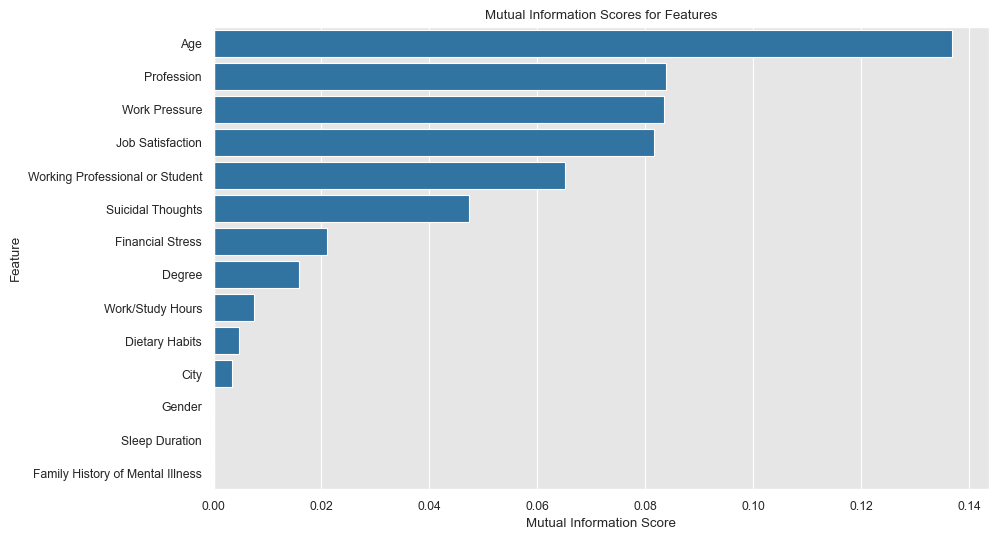

In [284]:
# Plot the MI scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Mutual Information Score', y='Feature', data=mi_df)
plt.title('Mutual Information Scores for Features')
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.show()

##### Top Predictors of Depression:

`Age` (0.139): Age shows the strongest association with depression, suggesting that specific age groups may be more vulnerable to mental health challenges.

`Work Pressure` (0.100): A significant factor, indicating that higher levels of work-related stress are closely tied to depression.

`Profession` (0.097): The type of profession also plays a significant role, possibly reflecting varying stress levels, job satisfaction, or financial stability.


##### Unexpected Findings: 

* Commonly assumed factors like sleep duration and family history of mental illness show little to no predictive power, indicating that their roles may be overstated or context-dependent.

Holistic Perspective:

* While some variables like job satisfaction and suicidal thoughts are moderately predictive, depression is likely influenced by a combination of factors rather than any single dominant variable.

#### 6. Data Visualization
Several visualizations were employed to illustrate the findings:

* Heatmaps highlighted correlations between features.
* Bar plots ranked features based on importance scores.
* Violin plots and boxplots showcased variance in depression rates across categories.
* Pairplots and scatterplots revealed trends in numerical features.

#### 8. Conclusion
This analysis has identified key factors contributing to depression and offered actionable insights. The combination of statistical methods ensured a thorough examination of the data. By focusing on the highlighted features, policymakers, employers, and educators can design targeted strategies to address the factors contributing to mental health challenges.
